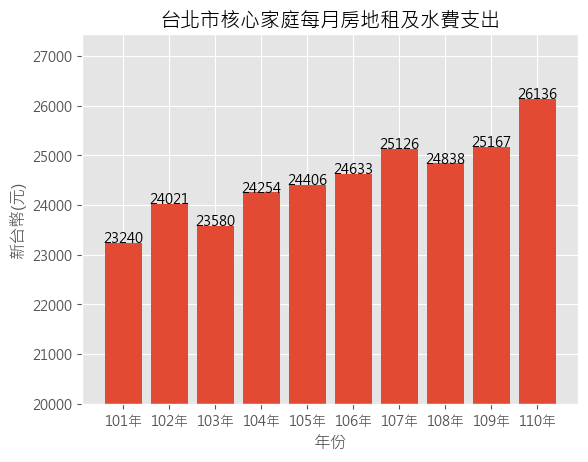

In [9]:
import pandas as pd

#將下載的政府資料命名為"taipeifamily.csv"
df=pd.read_csv(r"taipeifamily.csv")
#新增欄位"每月房地租及水費"，將欄位"[1]房地租及水費"/12
df["每月房地租及水費"]=df["[1]房地租及水費"]/12
#將"每月房地租及水費"取到整數位
df["每月房地租及水費"]=df["每月房地租及水費"].round(0)
df["每月房地租及水費"]=df["每月房地租及水費"].astype(int)
#取出3個欄位"年別","家庭組織型態","每月房地租及水費"命名為dfh
dfh=df[["年別","家庭組織型態","每月房地租及水費"]]
#挑出家庭組織型態為核心的資料命名為dfNuclear
dfNuclear=dfh[dfh["家庭組織型態"] == "核心"]
#以年份分類命名為dfNuclearyear
dfNuclearyear=dfNuclear.groupby("年別").sum()

#匯出直方圖
import matplotlib.pyplot as plt
# 選取圖的字型/直方圖樣式
from matplotlib.font_manager import FontProperties
plt.style.use("ggplot")
plt.rcParams["font.sans-serif"] = ["Microsoft JhengHei"]
# 以資料dfNuclearyear"年份"欄位為X軸，"每月房地租及水費"為Y軸
plt.bar(dfNuclearyear.index, dfNuclearyear["每月房地租及水費"])
# 設定 x 與 y 軸、以及標題名稱
plt.ylabel("新台幣(元)")
plt.xlabel("年份")
plt.title("台北市核心家庭每月房地租及水費支出")
#將y軸起點設為2萬，能更清楚看出房租支出變化
plt.ylim(ymin=20000)
#顯示出y軸的值，更容易看出差異
for a,b in zip(dfNuclearyear.index,dfNuclearyear["每月房地租及水費"]):
    plt.text(a, b, b,ha = 'center')
plt.show()